In [2]:
#Import libraries and datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

sbn.set(style="whitegrid")

df=pd.read_csv("data/heart_disease_uci.csv")
df.head(10)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [3]:
#Check for null values
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

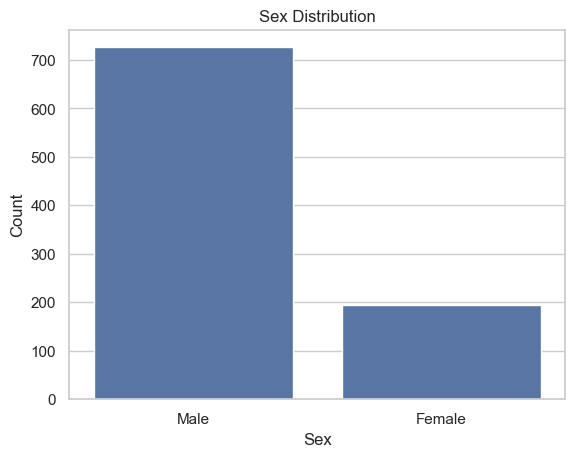

In [4]:
#Plot sex distribution
sbn.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.savefig('figures/sex_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

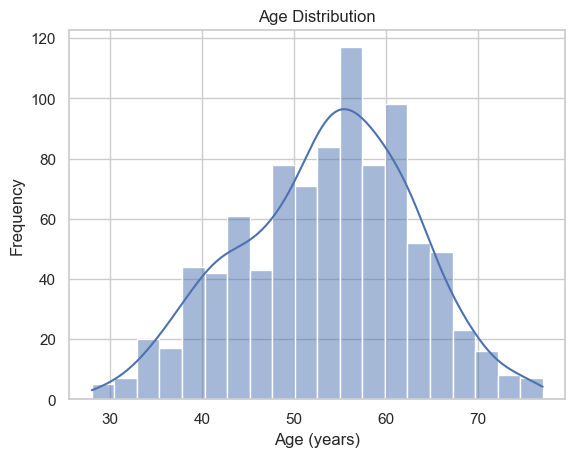

In [5]:
#Plot age distribution
sbn.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.savefig('figures/age_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

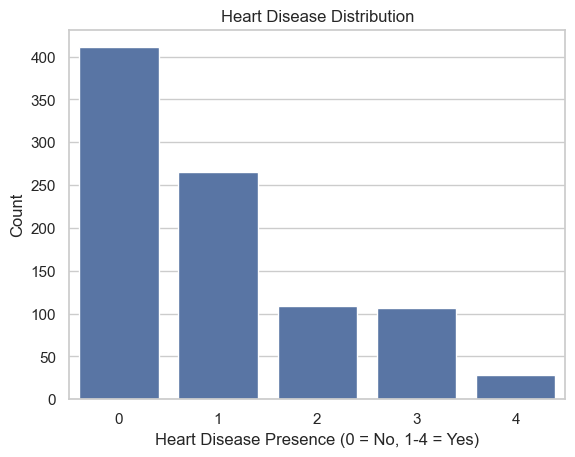

In [6]:
#Plot distribution of the target variable
sbn.countplot(x="num", data=df)
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease Presence (0 = No, 1-4 = Yes)')
plt.ylabel('Count')
plt.savefig('figures/heartdisease_dist.png', bbox_inches='tight', dpi=300)
plt.show()

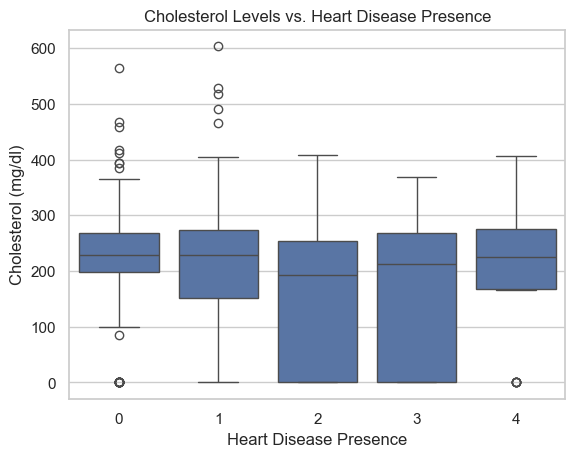

In [7]:
#Plot cholesterol vs. heart disease
sbn.boxplot(x='num', y='chol', data=df)
plt.title("Cholesterol Levels vs. Heart Disease Presence")
plt.xlabel("Heart Disease Presence")
plt.ylabel("Cholesterol (mg/dl)")
plt.savefig('figures/cholesterol.png', bbox_inches='tight', dpi=300)
plt.show()

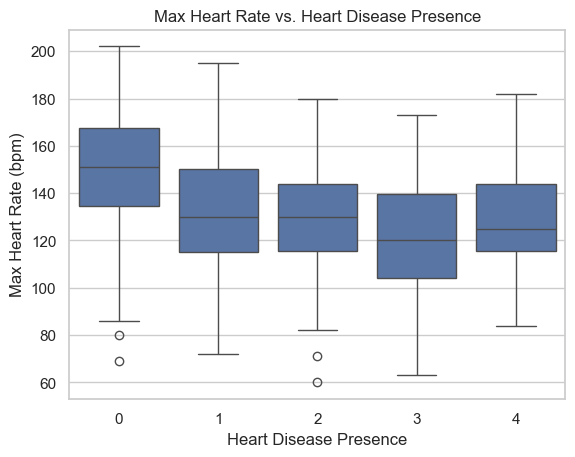

In [8]:
#Plot max heart rate vs. heart disease
sbn.boxplot(x='num', y='thalch', data=df)
plt.title("Max Heart Rate vs. Heart Disease Presence")
plt.xlabel("Heart Disease Presence")
plt.ylabel("Max Heart Rate (bpm)")
plt.savefig('figures/heartrate.png', bbox_inches='tight', dpi=300)
plt.show()

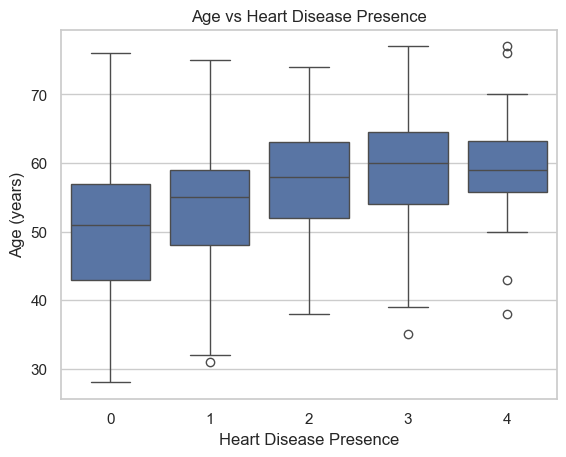

In [9]:
#Plot age vs. heart disease presence
sbn.boxplot(x='num', y='age', data=df)
plt.title('Age vs Heart Disease Presence')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Age (years)')
plt.savefig('figures/age_prevalence.png', bbox_inches='tight', dpi=300)
plt.show()

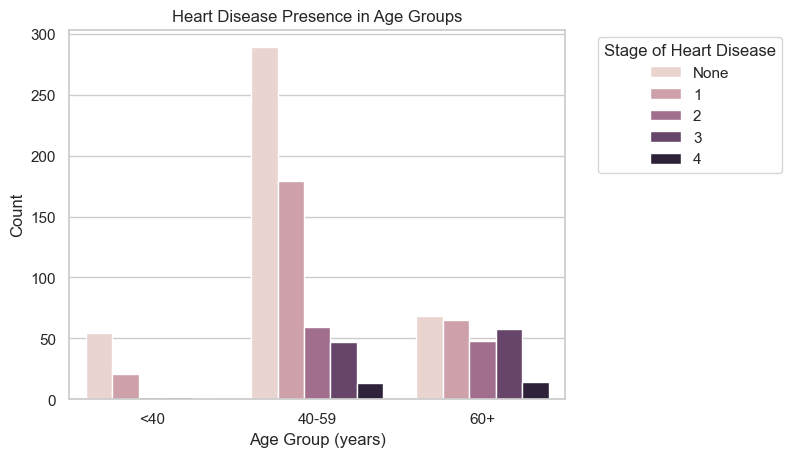

In [10]:
#Create age groups
df['age group'] = pd.cut(df['age'], bins=[0, 39, 59, 100], labels=['<40', '40-59', '60+'])

#Plot heart disease presence for age groups
sbn.countplot(x='age group', hue='num', data=df)
plt.title("Heart Disease Presence in Age Groups")
plt.xlabel("Age Group (years)")
plt.ylabel("Count")
plt.legend(title='Stage of Heart Disease', labels=['None', '1', '2', '3', '4'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('figures/agegroups_prevalence.png', bbox_inches='tight', dpi=300)
plt.show()

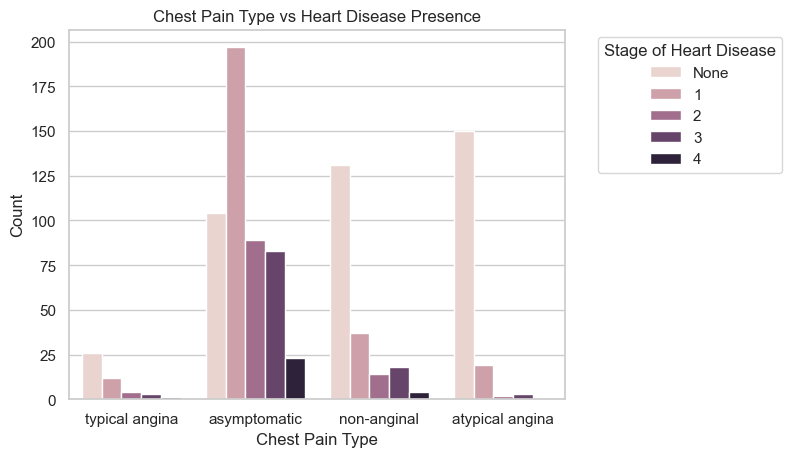

In [11]:
#Plot chest pain type vs. heart disease presence
sbn.countplot(x='cp', hue='num', data=df)
plt.title('Chest Pain Type vs Heart Disease Presence')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Stage of Heart Disease', labels=['None', '1', '2', '3', '4'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('figures/chest_pain.png', bbox_inches='tight', dpi=300)
plt.show()

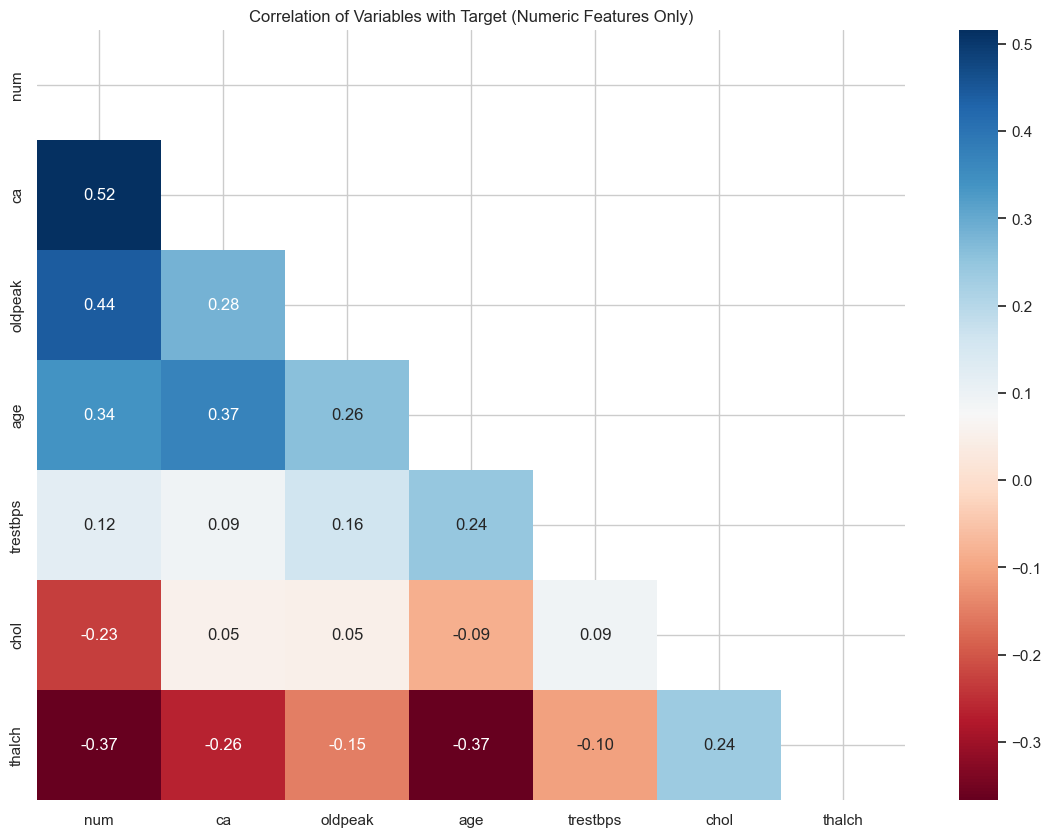

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns='id')

corr = numeric_df.corr()
# Sort correlations by relationship to target variable
target_corr = corr['num'].sort_values(ascending=False)

# Reorder correlation matrix rows and columns
sorted_corr = corr.loc[target_corr.index, target_corr.index]

# Plot heatmap
mask = np.triu(np.ones_like(sorted_corr, dtype=bool))

plt.figure(figsize=(14,10))
sbn.heatmap(sorted_corr, mask=mask, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Correlation of Variables with Target (Numeric Features Only)')
plt.savefig('figures/corr_heatmap.png', bbox_inches='tight', dpi=300)
plt.show()

In [28]:
#Calculate some statistics

heart_disease = df[df['num'] != 0]

# % of males in dataset
male_pct = (df['sex'].value_counts(normalize=True)['Male']) * 100
print(f"Percentage of male participants: {male_pct:.0f}%")

# % of participants aged 40–60
middle_age_pct=(df[(df['age']>=40) & (df['age']<=60)].shape[0] / df.shape[0]) * 100
print(f"Percentage of adults 40-60: {middle_age_pct: .0f}%")

#Amount and percentage of adults over 60 with advanced heart disease

# Filter for advanced heart disease (stage 2, 3, 4)
advanced_heart_disease = df[df['num'] > 1]

# Of those, filter for age 60+
advanced_over_60 = advanced_heart_disease[advanced_heart_disease['age'] >= 60]

# Get the count
count_advanced_over_60 = advanced_over_60.shape[0]

percentage_advanced_over_60 = (count_advanced_over_60 / advanced_heart_disease.shape[0]) * 100
print(f"Percentage of advanced heart disease patients aged 60 or older: {percentage_advanced_over_60:.1f}%")

#Average max heart rate in healthy (no disease) vs. disease group
healthy_thalach = df[df['num'] == 0]['thalch'].mean()
diseased_thalach = df[df['num'] != 0]['thalch'].mean()

print(f"Avg max heart rate (healthy): {healthy_thalach:.0f}")
print(f"Avg max heart rate (disease): {diseased_thalach:.0f}")

# % of asymptomatic chest pain cases with heart disease
asymptomatic = df[df['cp'] == 'asymptomatic']  
asymptomatic_heart_disease = (asymptomatic['num'] != 0).sum() / asymptomatic.shape[0] * 100
print(f"Asymptomatic chest pain cases with heart disease: {asymptomatic_heart_disease: .0f}%")

# % of patients with ca > 0 who have heart disease
ca_positive = df[df['ca']>0]
ca_positive_pct = (ca_positive['num'] != 0).sum() / ca_positive.shape[0] * 100
print(f"Percentage of patients with ca > 0 with heart disease: {ca_positive_pct: .0f}%")

#correlation coefficient of oldpeak, ca, and chol with heart disease

ca_corr = sorted_corr['num']['ca']
oldpeak_corr = sorted_corr['num']['oldpeak']
chol_corr = sorted_corr['num']['chol']

print(f"Correlation between ca and heart disease: {ca_corr:.2f}")
print(f"Correlation between oldpeak and heart disease: {oldpeak_corr:.2f}")
print(f"Correlation between chol and heart disease: {chol_corr:.2f}")

#amount and percentage of adults over 60 with heart disease
# Filter for advanced heart disease (stage 2, 3, 4)
advanced_heart_disease = df[df['num'] > 1]

# Of those, filter for age 60+
advanced_over_60 = advanced_heart_disease[advanced_heart_disease['age'] >= 60]

# Get the count
count_advanced_over_60 = advanced_over_60.shape[0]

print(f"Number of people with advanced heart disease who are aged 60 or older: {count_advanced_over_60}")

percentage_advanced_over_60 = (count_advanced_over_60 / advanced_heart_disease.shape[0]) * 100
print(f"Percentage of advanced heart disease patients aged 60 or older: {percentage_advanced_over_60:.1f}%")


Percentage of male participants: 79%
Percentage of adults 40-60:  67%
Percentage of advanced heart disease patients aged 60 or older: 49.2%
Avg max heart rate (healthy): 149
Avg max heart rate (disease): 128
Asymptomatic chest pain cases with heart disease:  79%
Percentage of patients with ca > 0 with heart disease:  75%
Correlation between ca and heart disease: 0.52
Correlation between oldpeak and heart disease: 0.44
Correlation between chol and heart disease: -0.23
Number of people with advanced heart disease who are aged 60 or older: 120
Percentage of advanced heart disease patients aged 60 or older: 49.2%
